
# Popular Foods per Shop 

This notebook analyzes customer order history to identify the **most popular foods for each shop**.  

**Why is this useful?**
- Shops can highlight their best-selling items.  
- Provider can recommend top items to new users.  
- Promotions and combo deals can be built around popular products.  


## Step 1: Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Step 2: Create Sample Dataset

In [2]:

# Simulated dataset 
np.random.seed(42)

shops = ['Pizza Hub', 'Sushi World', 'Burger Town', 'Healthy Bites']
foods = {
    'Pizza Hub': ['Margherita', 'Pepperoni', 'BBQ Chicken', 'Veggie Pizza'],
    'Sushi World': ['Salmon Roll', 'Tuna Sashimi', 'California Roll', 'Miso Soup'],
    'Burger Town': ['Cheeseburger', 'Chicken Burger', 'Fries', 'Onion Rings'],
    'Healthy Bites': ['Vegan Salad', 'Avocado Toast', 'Smoothie Bowl', 'Quinoa Wrap']
}

rows = []
order_id = 1
for _ in range(1000):
    shop = np.random.choice(shops)
    food = np.random.choice(foods[shop])
    customer = np.random.randint(1, 200)
    qty = np.random.randint(1, 4)
    rows.append([order_id, shop, customer, food, qty])
    order_id += 1

data = pd.DataFrame(rows, columns=['order_id','shop_id','customer_id','food_item','quantity'])
data.head()


,order_id,shop_id,customer_id,food_item,quantity
0,1,Burger Town,93,Onion Rings,3
1,2,Burger Town,189,Onion Rings,1
2,3,Burger Town,75,Chicken Burger,3
3,4,Healthy Bites,100,Vegan Salad,3
4,5,Sushi World,2,Salmon Roll,2


## Step 3: Exploratory Data Analysis

Dataset Shape: (1000, 5)
           order_id    shop_id  customer_id      food_item     quantity
count   1000.000000       1000  1000.000000           1000  1000.000000
unique          NaN          4          NaN             16          NaN
top             NaN  Pizza Hub          NaN  Avocado Toast          NaN
freq            NaN        266          NaN             75          NaN
mean     500.500000        NaN    96.885000            NaN     1.961000
std      288.819436        NaN    58.534093            NaN     0.810022
min        1.000000        NaN     1.000000            NaN     1.000000
25%      250.750000        NaN    46.000000            NaN     1.000000
50%      500.500000        NaN    96.000000            NaN     2.000000
75%      750.250000        NaN   150.000000            NaN     3.000000
max     1000.000000        NaN   199.000000            NaN     3.000000


C:\Users\SPINO SHOP\AppData\Local\Temp\ipykernel_24476\1685112180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")


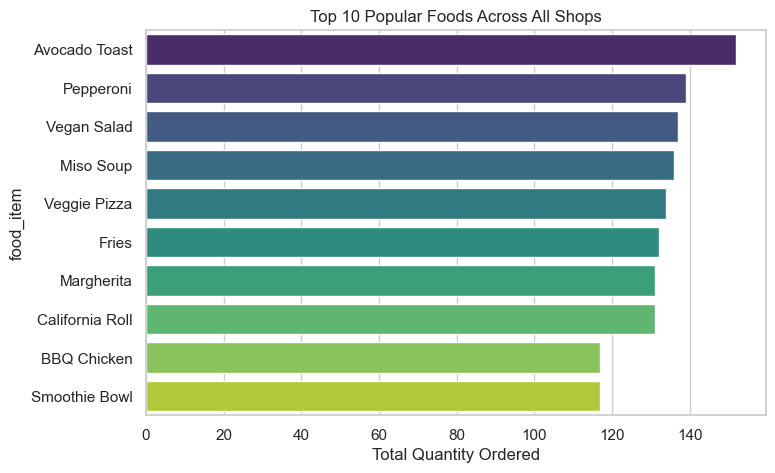

In [3]:

print("Dataset Shape:", data.shape)
print(data.describe(include='all'))

# Top 10 overall popular foods
top_foods = data.groupby('food_item')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")
plt.title("Top 10 Popular Foods Across All Shops")
plt.xlabel("Total Quantity Ordered")
plt.show()


## Step 4: Popular Foods per Shop

In [4]:

# Group by shop and food item
shop_food_stats = data.groupby(['shop_id','food_item'])['quantity'].sum().reset_index()

# Rank foods per shop
shop_food_stats['rank'] = shop_food_stats.groupby('shop_id')['quantity'].rank(ascending=False, method='first')

# Show top 3 foods per shop
top4_per_shop = shop_food_stats[shop_food_stats['rank'] <= 4]
top4_per_shop.sort_values(['shop_id','rank'], inplace=True)
top4_per_shop


,shop_id,food_item,quantity,rank
2,Burger Town,Fries,132,1.0
3,Burger Town,Onion Rings,109,2.0
0,Burger Town,Cheeseburger,105,3.0
1,Burger Town,Chicken Burger,93,4.0
4,Healthy Bites,Avocado Toast,152,1.0
7,Healthy Bites,Vegan Salad,137,2.0
6,Healthy Bites,Smoothie Bowl,117,3.0
5,Healthy Bites,Quinoa Wrap,116,4.0
10,Pizza Hub,Pepperoni,139,1.0
11,Pizza Hub,Veggie Pizza,134,2.0


## Step 5: Visualization of Top Foods per Shop

C:\Users\SPINO SHOP\AppData\Local\Temp\ipykernel_24476\3706660854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=top4_per_shop, x="quantity", y="food_item", col="shop_id",


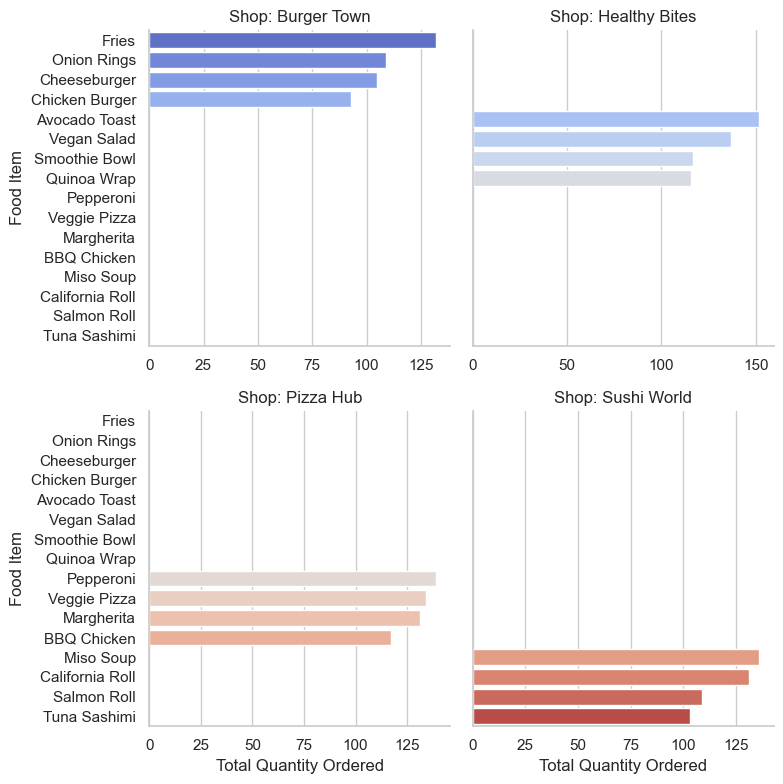

In [5]:

# Plot bar chart per shop
g = sns.catplot(data=top4_per_shop, x="quantity", y="food_item", col="shop_id",
                kind="bar", col_wrap=2, sharex=False, height=4, palette="coolwarm")
g.set_titles("Shop: {col_name}")
g.set_axis_labels("Total Quantity Ordered", "Food Item")
plt.show()


## Step 6: Shop-Level Insights

In [6]:

for shop in shops:
    print(f"\nTop foods in {shop}:")
    subset = top4_per_shop[top4_per_shop['shop_id'] == shop]
    for _, row in subset.iterrows():
        print(f" - {row['food_item']} (ordered {int(row['quantity'])} times)")



Top foods in Pizza Hub:
 - Pepperoni (ordered 139 times)
 - Veggie Pizza (ordered 134 times)
 - Margherita (ordered 131 times)
 - BBQ Chicken (ordered 117 times)

Top foods in Sushi World:
 - Miso Soup (ordered 136 times)
 - California Roll (ordered 131 times)
 - Salmon Roll (ordered 109 times)
 - Tuna Sashimi (ordered 103 times)

Top foods in Burger Town:
 - Fries (ordered 132 times)
 - Onion Rings (ordered 109 times)
 - Cheeseburger (ordered 105 times)
 - Chicken Burger (ordered 93 times)

Top foods in Healthy Bites:
 - Avocado Toast (ordered 152 times)
 - Vegan Salad (ordered 137 times)
 - Smoothie Bowl (ordered 117 times)
 - Quinoa Wrap (ordered 116 times)



## Step 7: Conclusion & Business Use Case

- We identified the **top 4 most popular foods per shop**.  
- Shops can feature these items at the top of their menu.  
- Provider can recommend these items to new or inactive customers.  
- Promotions and bundles can be designed around these best-sellers.  

**Next Steps:**
- Replace the simulated dataset with Provider’s actual order data.  
- Automate this analysis to refresh weekly or monthly.  
- Integrate results into Provider’s app for real-time recommendations.  
